## Human Activity Recognition from accelerometer data

Note: Attempting to use Deep Neural Net architecture

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
datafolder='Activity_Recognition_from Single_Chest-Mounted_Accelerometer/'
person={}
for i in range(15):
    person[i+1]= pd.read_csv(datafolder+str(i+1)+'.csv',index_col=0,names=['seq num', 'ax', 'ay', 'az', 'label']) 

In [3]:
for i in person: print(i,'shape:',person[i].shape)#,'columns:',person[i].columns)

1 shape: (162501, 4)
2 shape: (138001, 4)
3 shape: (102341, 4)
4 shape: (122201, 4)
5 shape: (160001, 4)
6 shape: (140901, 4)
7 shape: (163001, 4)
8 shape: (138001, 4)
9 shape: (166741, 4)
10 shape: (126801, 4)
11 shape: (104451, 4)
12 shape: (114702, 4)
13 shape: (67651, 4)
14 shape: (116101, 4)
15 shape: (103501, 4)


In [4]:
class_dict={}
class_dict[1]='Working at Computer'
class_dict[2]='Standing Up, Walking and Going Up/Down stairs' 
class_dict[3]='Standing'
class_dict[4]='Walking'
class_dict[5]='Going Up/Down Stairs'
class_dict[6]='Walking and Talking with Someone'
class_dict[7]='Talking while Standing'

In [5]:
#person[1].head()

In [6]:
#after 100000 the time step does not increment by 1?
#person[1].iloc[99997:100003]

In [7]:
#there are entries with invalid class=0
#person[2][person[2]['label']==0].head()

In [8]:
def plot_data(folder='raw',save=False):
    os.system('mkdir -p plots/'+folder)
    for i in person:

        fig, ax = plt.subplots(4,1, figsize=(6.4*1.5,4.8*1.5),sharex='col') 

        ax[0].plot(person[i]['ax'])
        ax[0].set_ylabel('ax')

        ax[1].plot(person[i]['ay'])
        ax[1].set_ylabel('ay')

        ax[2].plot(person[i]['az'])
        ax[2].set_ylabel('az')

        ax[3].plot(person[i]['label'])
        ax[3].set_ylabel('label')

        fig.suptitle('person '+str(i))

        if(save):fig.savefig('plots/'+folder+'/'+'person'+str(i))
        
        
def normalize_data(dataset):
    dataset = dataset - dataset.mean()
    dataset = dataset/dataset.std()
    return dataset


def get_data_per_class_per_person():
    #separate data into classes 
    #act := act[class type][person number]
    act = {}
    for i in range(1,8):
        act[i] = {}
        for j in person:
            act[i][j] = person[j][person[j]['label']==i]

    return act


def plot_per_class_per_person(act,save=False):
    folder = 'separate_class'
    os.system('mkdir -pv plots/'+folder)
    for c in range(1,8):

        for i in person:

            fig, ax = plt.subplots(3,1, figsize=(6.4*2,4.8*1.5),sharex='col') 

            ax[0].plot(act[c][i]['ax'],'.')
            ax[0].set_ylabel('ax')

            ax[1].plot(act[c][i]['ay'],'.')
            ax[1].set_ylabel('ay')

            ax[2].plot(act[c][i]['az'],'.')
            ax[2].set_ylabel('az')

            fig.suptitle('person '+str(i)+': '+class_dict[c])

            if(save):fig.savefig('plots/'+folder+'/'+'act_'+str(c)+'_person '+str(i))

            if i > 3:
                fig.clf()


# Remove entries with label=0
def remove_0_labels():
    for i in person:
        index_to_drop = person[i][person[i]['label']==0].index
        person[i] = person[i].drop(index_to_drop)

        
# normalize data
def normalize_all_data():
    for i in person: 
        for col in ['ax','ay','az']:
            person[i][col] = normalize_data(person[i][col])

In [9]:
###FEATURE ENGINEERING

def add_features(window=52 * 3):

    print('using window of',window)

    #Add rolling mean
    for i in person:
        for col in ['ax','ay','az']:
            person[i][col+'_MA'+str(window)] = person[i][col].rolling(window).mean()

    #Add rolling std
    for i in person:
        for col in ['ax','ay','az']:
            person[i][col+'_stdA'+str(window)] = person[i][col].rolling(window).std()

    #Add rolling sum
    for i in person:
        for col in ['ax','ay','az']:
            person[i][col+'_sumA'+str(window)] = person[i][col].rolling(window).sum()

    #Add rolling max
    for i in person:
        for col in ['ax','ay','az']:
            person[i][col+'_maxA'+str(window)] = person[i][col].rolling(window).max()

    #Add rolling min
    for i in person:
        for col in ['ax','ay','az']:
            person[i][col+'_minA'+str(window)] = person[i][col].rolling(window).min()

    #Add rolling median
    for i in person:
        for col in ['ax','ay','az']:
            person[i][col+'_medA'+str(window)] = person[i][col].rolling(window).median()

    #Add rolling covariance
    for i in person:
        for col in ['ax','ay','az']:
            person[i][col+'_covA'+str(window)] = person[i][col].rolling(window).cov()

    #Add rolling kurtosis
    for i in person:
        for col in ['ax','ay','az']:
            person[i][col+'_kurtA'+str(window)] = person[i][col].rolling(window).kurt()

    #Add rolling skew
    for i in person:
        for col in ['ax','ay','az']:
            person[i][col+'_skewA'+str(window)] = person[i][col].rolling(window).skew()    

    #Add magnitude of total acc vector sqrt(ax^2+ay^2+az^2)
    for i in person:
        person[i]['mag_a'] = np.sqrt (person[i]['ax']**2 + person[i]['ay']**2 + person[i]['az']**2)

    #Add rolling mean of magnitude of total acc 
    for i in person:
        person[i]['mag_a_MA'] = person[i]['mag_a'].rolling(window).mean()

    #Add rolling sum of magnitude of total acc 
    for i in person:
        person[i]['mag_a_MA'] = person[i]['mag_a'].rolling(window).sum()

    #Add rolling std of magnitude of total acc 
    for i in person:
        person[i]['mag_a_MA'] = person[i]['mag_a'].rolling(window).std()

    #Add angle
    for i in person:
        for col in ['ax','ay','az']:
            person[i]['phi_'+col] = np.arccos( person[i][col] / person[i]['mag_a'] )   

    #Add difference between time steps 
    for i in person:
        for col in ['ax','ay','az']:
            person[i][col+'_diff'] = person[i][col].diff()

    #Add rolling mean of difference between time steps 
    for i in person:
        for col in ['ax','ay','az']:
            person[i][col+'_diff_MA'] = person[i][col+'_diff'].rolling(window).mean()



In [10]:
# preprocess dataset for Time series Neural Net architecture

def get_loop_param(dataset):
    window=52*3
    overlap=0.5
    length=dataset.shape[0]
    stride=int(window*overlap)
    num_loop=int(length / stride)
    skip= int(length % stride)
    print('len =',length,'num_loop =',num_loop,'window =',window,'stride =',stride,'skip =',skip,'check =', num_loop*stride + skip)
    
    return num_loop,window,stride,skip

def preprocess_into_3d_np(dataset):

    num_loop,window,stride,skip = get_loop_param(dataset)

    X = np.empty([num_loop,window,dataset.shape[1]-1])
    Y = np.empty([num_loop,1])
    
    datasetX = dataset.drop(columns=['label'])
    datasetY = dataset['label']

    for i in range(num_loop):
        for j in range(window):

            window_iloc = i*stride + j 
            if (i%250==0 and j==0): print(i,j,window_iloc)
            try:
                X[i][j] = datasetX.iloc[window_iloc].values
            except Exception as e:
                print('finished, or error occured:',e)
                break

        # get most frequent value of label in the window
        Y[i] = datasetY.iloc[i*stride : i*stride + window].value_counts().idxmax() 

    return X,Y

In [11]:
def save_preprocess_3d_np(person,save_folder):

    X_person={}
    Y_person={}

    os.system('mkdir -vp '+save_folder)
    for p in person:
        print('\nPerson',p,'\n')
        X_person[p],Y_person[p] = preprocess_into_3d_np(person[p])
        np.save(save_folder+'/X_person_{}'.format(p),X_person[p])
        np.save(save_folder+'/Y_person_{}'.format(p),Y_person[p])  

def get_preprocess_3d_np(save_folder):
    X_person={}
    Y_person={}

    print("\nLoad from folder:",save_folder,'\n')
    for p in person:
        X_person[p]=np.load(save_folder+'/X_person_{}.npy'.format(p))
        Y_person[p]=np.load(save_folder+'/Y_person_{}.npy'.format(p))  
        print('\tLoading Person',p,':',X_person[p].shape,Y_person[p].shape,'\n')

    return X_person,Y_person

In [12]:
#clean up NaN
def fillna_with_zeros():
    for p in person:
        person[p].fillna(0)

In [13]:
#probably need some filtering
def lowpassfilter(dataset):
    pass

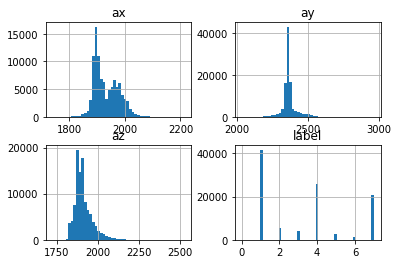

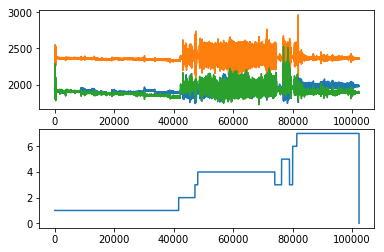

In [14]:
# plot_data('raw')
fig,ax = person[3].hist(bins=50)
fig2,ax2 = plt.subplots(2,1)
ax2[0].plot(person[3].drop(columns='label'))
ax2[1].plot(person[3]['label'])

In [15]:
remove_0_labels()
normalize_all_data()

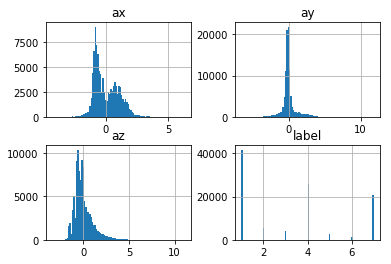

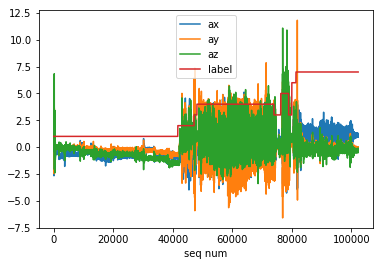

In [16]:
# plot_data('normalized')
person[3].hist(bins=100)
person[3].plot()

In [17]:
# act = get_data_per_class_per_person()
# plot_per_class_per_person(act)

In [18]:
person[3].head()

,ax,ay,az,label
seq num,,,,
0.0,-0.100870,0.314815,0.566221,1
1.0,-0.279598,0.176180,0.584243,1
2.0,-0.301938,0.156375,0.548200,1
3.0,-0.212575,0.314815,0.674352,1
4.0,-0.257257,0.156375,0.674352,1


In [19]:
# save_preprocess_3d_np(person,'data_norm_3d_np')
# add_features()
# fillna_with_zeros() 
# save_preprocess_3d_np(person,'data_norm_3d_np_withFeatures')

In [51]:
X_person, Y_person = get_preprocess_3d_np('data_norm_3d_np')
X_ext_person, Y_ext_person = get_preprocess_3d_np('data_norm_3d_np_withFeatures')


Load from folder: data_norm_3d_np 

	Loading Person 1 : (2083, 156, 3) (2083, 1) 

	Loading Person 2 : (1765, 156, 3) (1765, 1) 

	Loading Person 3 : (1311, 156, 3) (1311, 1) 

	Loading Person 4 : (1566, 156, 3) (1566, 1) 

	Loading Person 5 : (2051, 156, 3) (2051, 1) 

	Loading Person 6 : (1803, 156, 3) (1803, 1) 

	Loading Person 7 : (2089, 156, 3) (2089, 1) 

	Loading Person 8 : (1766, 156, 3) (1766, 1) 

	Loading Person 9 : (2099, 156, 3) (2099, 1) 

	Loading Person 10 : (1625, 156, 3) (1625, 1) 

	Loading Person 11 : (1339, 156, 3) (1339, 1) 

	Loading Person 12 : (1470, 156, 3) (1470, 1) 

	Loading Person 13 : (867, 156, 3) (867, 1) 

	Loading Person 14 : (1488, 156, 3) (1488, 1) 

	Loading Person 15 : (1326, 156, 3) (1326, 1) 


Load from folder: data_norm_3d_np_withFeatures 

	Loading Person 1 : (2083, 156, 41) (2083, 1) 

	Loading Person 2 : (1765, 156, 41) (1765, 1) 

	Loading Person 3 : (1311, 156, 41) (1311, 1) 

	Loading Person 4 : (1566, 156, 41) (1566, 1) 

	Loading Per

In [52]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical


#OMP: Error #15: Initializing libiomp5.dylib, but found libomp.dylib already initialized.
#http://support.genarts.com/knowledgebase/article/View/1365/339/why-am-i-getting-this-error-omp-error-15-initializing-libiomp5so-but-found-libguideso-already-initialized
#https://stackoverflow.com/questions/53014306/error-15-initializing-libiomp5-dylib-but-found-libiomp5-dylib-already-initial
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [57]:
# X_person = X_ext_person
# Y_person = Y_ext_person

#train test "split"
trainX = X_person[1]
trainy = Y_person[1]
for i in [2,3,4,5,6,7,8,9,10]:
    trainX = np.concatenate((trainX,X_person[i]))
    trainy =np.concatenate((trainy,Y_person[i]))
print(trainX.shape,trainy.shape)

valX = X_person[11]
valX = np.concatenate((valX,X_person[12]))
valy = Y_person[11]
valy = np.concatenate((valy,Y_person[12]))
print(valX.shape,valy.shape)

#train test "split"
testX = X_person[13]
testy = Y_person[13]
for i in [14,15]:
    testX = np.concatenate((testX,X_person[i]))
    testy =np.concatenate((testy,Y_person[i]))
print(testX.shape,testy.shape)


# zero-offset class values
trainy = trainy - 1
valy = valy - 1
testy = testy - 1

# one hot encode y
trainy = to_categorical(trainy,dtype='int')
valy = to_categorical(valy,dtype='int')
testy = to_categorical(testy,dtype='int')


(18158, 156, 3) (18158, 1)
(2809, 156, 3) (2809, 1)
(3681, 156, 3) (3681, 1)


In [58]:
# summarize scores
def summarize_results(scores):
    print(scores)
    m, s = np.mean(scores), np.std(scores)
    print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

# fit and evaluate a model
def evaluate_model_cnn(trainX, trainy, testX, testy):
    verbose, epochs, batch_size = 1, 10, 32
    n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit network
    model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
    # evaluate model
    _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=1)
    return accuracy,model

# fit and evaluate a model
def evaluate_model_lstm(trainX, trainy, testX, testy):
    verbose, epochs, batch_size = 1, 15, 64
    n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
    model = Sequential()
    model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit network
    model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
    # evaluate model
    _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=verbose)
    return accuracy,model


In [59]:
score_cnn,model_cnn = evaluate_model_cnn(trainX, trainy, valX, valy)

Epoch 1/10
18158/18158 [==============================] - 17s 927us/step - loss: 0.8432 - acc: 0.7321
Epoch 2/10
18158/18158 [==============================] - 15s 845us/step - loss: 0.6400 - acc: 0.7935
Epoch 3/10
18158/18158 [==============================] - 14s 764us/step - loss: 0.5415 - acc: 0.8158
Epoch 4/10
18158/18158 [==============================] - 13s 738us/step - loss: 0.4742 - acc: 0.8368
Epoch 5/10
18158/18158 [==============================] - 14s 749us/step - loss: 0.4124 - acc: 0.8549
Epoch 6/10
18158/18158 [==============================] - 13s 725us/step - loss: 0.3732 - acc: 0.8683
Epoch 7/10
18158/18158 [==============================] - 13s 743us/step - loss: 0.3283 - acc: 0.8830
Epoch 8/10
18158/18158 [==============================] - 13s 721us/step - loss: 0.2984 - acc: 0.8906
Epoch 9/10
18158/18158 [==============================] - 15s 836us/step - loss: 0.2979 - acc: 0.8972
Epoch 10/10
2809/2809 [==============================] - 1s 348us/step


In [60]:
score_lstm,model_lstm = evaluate_model_lstm(trainX, trainy, valX, valy)

Epoch 1/15
18158/18158 [==============================] - 105s 6ms/step - loss: 1.2691 - acc: 0.5699
Epoch 2/15
18158/18158 [==============================] - 108s 6ms/step - loss: 1.0470 - acc: 0.6624
Epoch 3/15
18158/18158 [==============================] - 110s 6ms/step - loss: 1.0141 - acc: 0.6750
Epoch 4/15
18158/18158 [==============================] - 103s 6ms/step - loss: 0.9780 - acc: 0.6728
Epoch 5/15
18158/18158 [==============================] - 101s 6ms/step - loss: 0.9613 - acc: 0.6875
Epoch 6/15
18158/18158 [==============================] - 100s 6ms/step - loss: 0.9211 - acc: 0.7048
Epoch 7/15
18158/18158 [==============================] - 100s 6ms/step - loss: 0.8945 - acc: 0.7118
Epoch 8/15
18158/18158 [==============================] - 100s 6ms/step - loss: 0.8577 - acc: 0.7282
Epoch 9/15
18158/18158 [==============================] - 100s 6ms/step - loss: 0.9169 - acc: 0.7033
Epoch 10/15
18158/18158 [==============================] - 101s 6ms/step - loss: 0.8738 - a

In [64]:
y_pred_cnn = model_cnn.predict(testX)
y_pred_lstm = model_lstm.predict(testX)

In [65]:
print('CNN model score:',score_cnn)
print('LSTM model score:',score_lstm)

CNN model score: 0.45674617300735076
LSTM model score: 0.5033819864879685


In [67]:
y_pred_cnn_argmax = np.argmax(y_pred_cnn, axis=1)+1 #recover off set
print(y_pred_cnn_argmax.shape)
y_pred_lstm_argmax = np.argmax(y_pred_lstm, axis=1)+1 #recover off set
print(y_pred_lstm_argmax.shape)

(3681,)
(3681,)


In [68]:
y_test = np.argmax(testy,axis=1)+1
y_test

array([1, 1, 1, ..., 7, 7, 7])

In [69]:
y_pred_cnn_argmax

array([1, 1, 1, ..., 7, 7, 7])

In [70]:
y_pred_lstm_argmax

array([1, 1, 1, ..., 7, 7, 7])

In [71]:
crosstab = pd.crosstab(y_test, y_pred_cnn_argmax,
                          rownames=['True'], colnames=['Predicted'],
                          margins=True)
crosstab

Predicted,1,2,3,4,5,6,7,All
True,,,,,,,,
1,169,20,338,5,3,38,999,1572
2,20,1,3,2,1,18,43,88
3,12,10,47,79,8,9,205,370
4,10,6,48,685,11,4,63,827
5,1,4,7,67,8,7,38,132
6,3,2,9,17,3,0,14,48
7,62,4,46,53,14,5,460,644
All,277,47,498,908,48,81,1822,3681


In [72]:
crosstab = pd.crosstab(y_test, y_pred_lstm_argmax,
                          rownames=['True'], colnames=['Predicted'],
                          margins=True)
crosstab

Predicted,1,2,3,4,5,7,All
True,,,,,,,
1,339,1,0,13,0,1219,1572
2,35,0,0,2,0,51,88
3,40,0,0,108,1,221,370
4,17,0,0,752,0,58,827
5,1,0,0,95,0,36,132
6,3,0,0,22,0,23,48
7,31,0,1,77,0,535,644
All,466,1,1,1069,1,2143,3681


[Text(0, 0.5, 'Working at Computer'),
 Text(0, 1.5, 'Standing Up, Walking and Going Up/Down stairs'),
 Text(0, 2.5, 'Standing'),
 Text(0, 3.5, 'Walking'),
 Text(0, 4.5, 'Going Up/Down Stairs'),
 Text(0, 5.5, 'Walking and Talking with Someone'),
 Text(0, 6.5, 'Talking while Standing')]

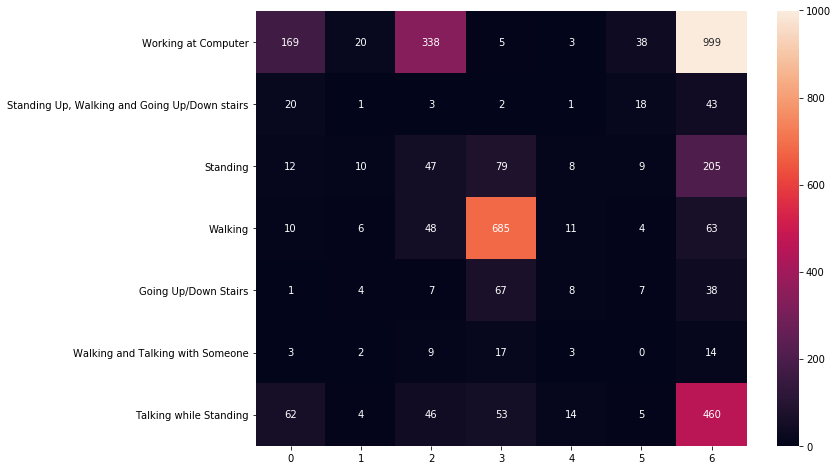

In [73]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_cnn_argmax)

class_names = [class_dict[i] for i in range(1,8)]

import seaborn as sns
ax = sns.heatmap(cnf_matrix,annot=True,fmt="d")
ax.figure.set_size_inches(11,8)
# ax.set_xticklabels(class_names,rotation=45)
ax.set_yticklabels(class_names,rotation='horizontal')


[Text(0, 0.5, 'Working at Computer'),
 Text(0, 1.5, 'Standing Up, Walking and Going Up/Down stairs'),
 Text(0, 2.5, 'Standing'),
 Text(0, 3.5, 'Walking'),
 Text(0, 4.5, 'Going Up/Down Stairs'),
 Text(0, 5.5, 'Walking and Talking with Someone'),
 Text(0, 6.5, 'Talking while Standing')]

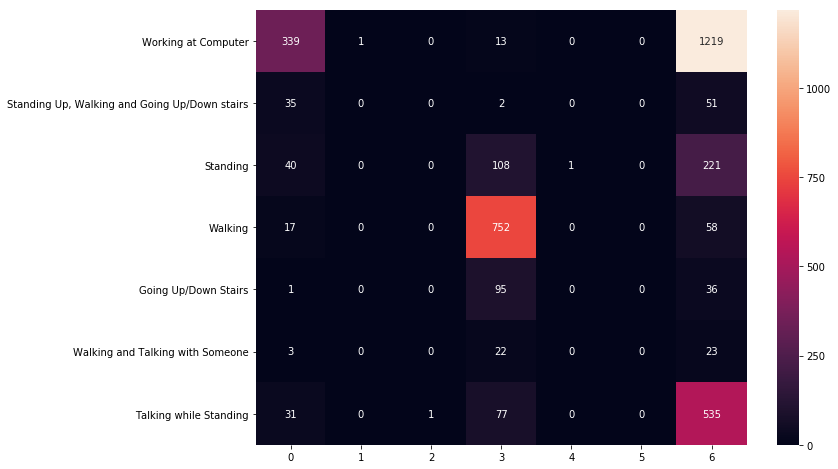

In [74]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_lstm_argmax)

class_names = [class_dict[i] for i in range(1,8)]

import seaborn as sns
ax = sns.heatmap(cnf_matrix,annot=True,fmt="d")
ax.figure.set_size_inches(11,8)
# ax.set_xticklabels(class_names,rotation=45)
ax.set_yticklabels(class_names,rotation='horizontal')
